This is the eda analysis of the guitar figure data set from ( https://archive.ics.uci.edu/dataset/575/guitar+chords+finger+positions )

objective : eda of the data set and making a guitar cord progrssion visulizer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Read the CSV file with semicolon delimiter
df = pd.read_csv('chord-fingers.csv', delimiter=';')
df.head(10)

,CHORD_ROOT,CHORD_TYPE,CHORD_STRUCTURE,FINGER_POSITIONS,NOTE_NAMES
0,A#,13,1;3;5;b7;9;11;13,"x,1,0,2,3,4","A#,C##,G#,B#,F##"
1,A#,13,1;3;5;b7;9;11;13,"4,x,3,2,1,1","A#,G#,B#,C##,F##"
2,A#,13,1;3;5;b7;9;11;13,"1,x,1,2,3,4","A#,G#,C##,F##,B#"
3,A#,7(#9),1;3;5;b7;#9,"x,1,0,2,4,3","A#,C##,G#,B##,E#"
4,A#,7(#9),1;3;5;b7;#9,"2,1,3,3,3,x","A#,C##,G#,B##,E#"
5,A#,7(#9),1;3;5;b7;#9,"1,3,1,2,1,4","A#,E#,G#,C##,E#,B##"
6,A#,9,1;3;5;b7;9,"x,2,0,3,4,x","A#,C##,G#,B#"
7,A#,9,1;3;5;b7;9,"x,1,3,2,4,x","C##,G#,B#,E#"
8,A#,9,1;3;5;b7;9,"1,x,1,2,1,4","A#,G#,C##,E#,B#"
9,A#,9b5,1;3;b5;b7;9,"0,1,0,2,3,0","E,A#,C##,G#,B#,E"


In [ ]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHORD_ROOT        2632 non-null   object
 1   CHORD_TYPE        2632 non-null   object
 2   CHORD_STRUCTURE   2632 non-null   object
 3   FINGER_POSITIONS  2632 non-null   object
 4   NOTE_NAMES        2632 non-null   object
dtypes: object(5)
memory usage: 102.9+ KB
None

First few rows:
  CHORD_ROOT CHORD_TYPE   CHORD_STRUCTURE FINGER_POSITIONS        NOTE_NAMES
0         A#         13  1;3;5;b7;9;11;13      x,1,0,2,3,4  A#,C##,G#,B#,F##
1         A#         13  1;3;5;b7;9;11;13      4,x,3,2,1,1  A#,G#,B#,C##,F##
2         A#         13  1;3;5;b7;9;11;13      1,x,1,2,3,4  A#,G#,C##,F##,B#
3         A#      7(#9)       1;3;5;b7;#9      x,1,0,2,4,3  A#,C##,G#,B##,E#
4         A#      7(#9)       1;3;5;b7;#9      2,1,3,3,3,x  A#,C##,G#,B##,E#


In [ ]:
# Count unique values in each column
print("\nUnique values in each column:")
for column in df.columns:
    print(f"\n{column}: {df[column].nunique()} unique values")
    print(df[column].value_counts().head())


Unique values in each column:

CHORD_ROOT: 18 unique values
CHORD_ROOT
A    233
C    226
G    224
D    223
E    220
Name: count, dtype: int64

CHORD_TYPE: 42 unique values
CHORD_TYPE
7       208
maj     203
m7      177
m       154
dim7    142
Name: count, dtype: int64

CHORD_STRUCTURE: 42 unique values
CHORD_STRUCTURE
1;3;5;b7       208
1;3;5          203
1;b3;5;b7      177
1;b3;5         154
1;b3;b5;bb7    142
Name: count, dtype: int64

FINGER_POSITIONS: 769 unique values
FINGER_POSITIONS
x,x,1,3,2,4    68
x,2,1,3,4,x    57
x,2,3,1,4,x    40
x,1,3,2,4,x    29
2,x,3,4,1,x    28
Name: count, dtype: int64

NOTE_NAMES: 2152 unique values
NOTE_NAMES
Eb,G,C       6
Bb,Db,G      6
Db,G,Bb      5
Eb,A,C,F#    5
A,Eb,Gb,C    5
Name: count, dtype: int64


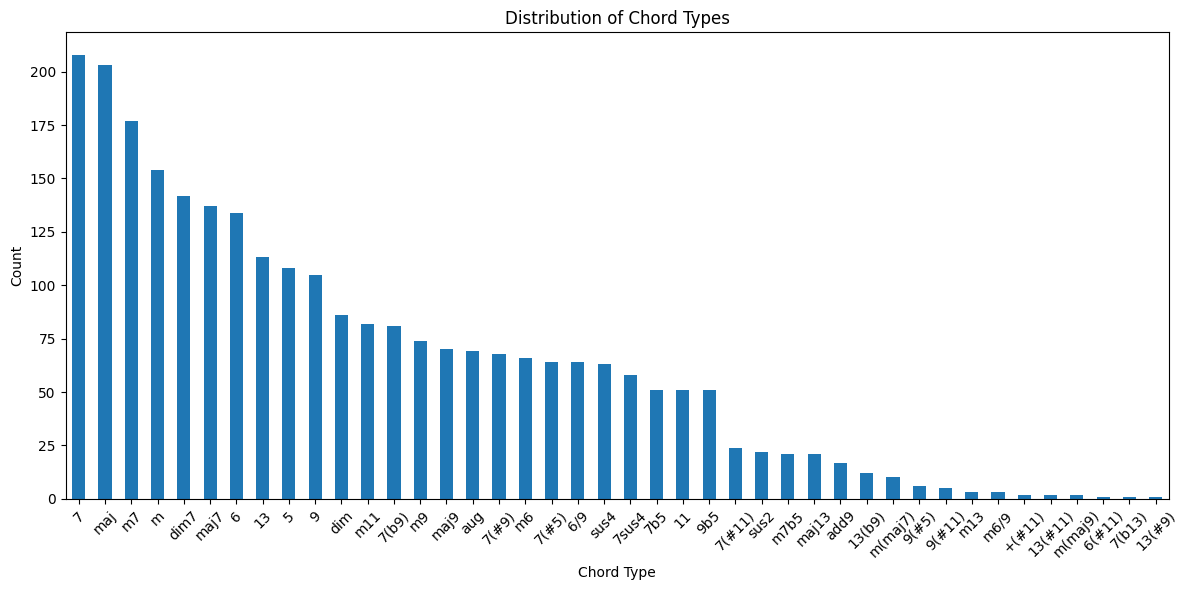

In [ ]:
# Analyze chord types distribution
plt.figure(figsize=(12, 6))
df['CHORD_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Chord Types')
plt.xlabel('Chord Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

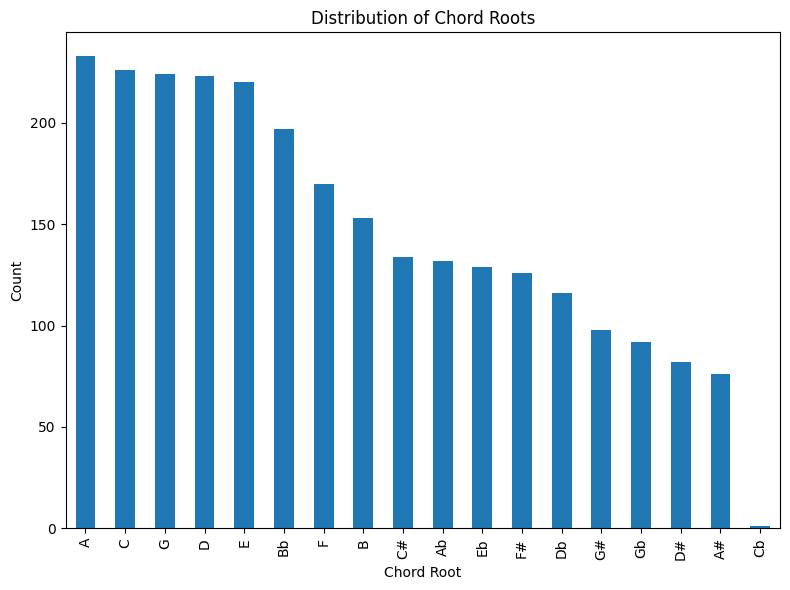

In [ ]:
# Analyze chord roots distribution
plt.figure(figsize=(8, 6))
df['CHORD_ROOT'].value_counts().plot(kind='bar')
plt.title('Distribution of Chord Roots')
plt.xlabel('Chord Root')
plt.ylabel('Count')
plt.tight_layout()

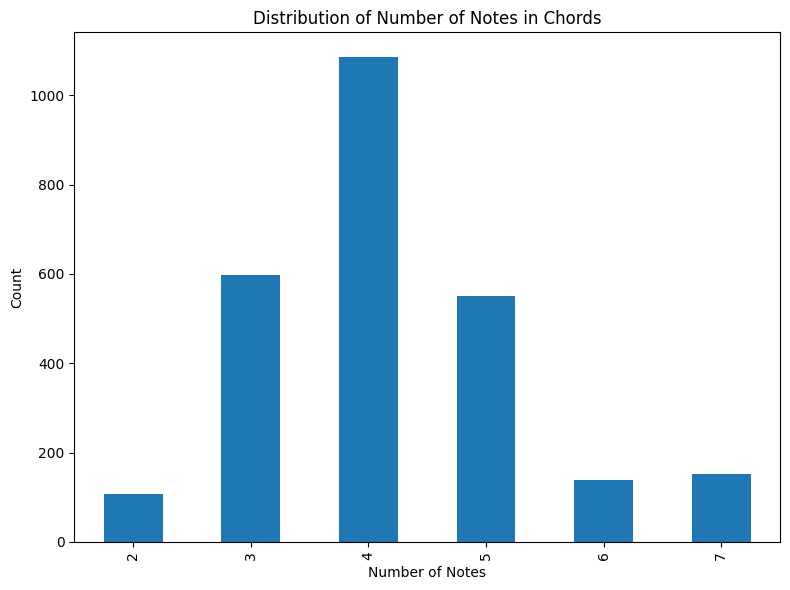

In [ ]:
# Analyze number of notes in chord structure
df['num_notes'] = df['CHORD_STRUCTURE'].str.count(';') + 1
plt.figure(figsize=(8, 6))
df['num_notes'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Notes in Chords')
plt.xlabel('Number of Notes')
plt.ylabel('Count')
plt.tight_layout()

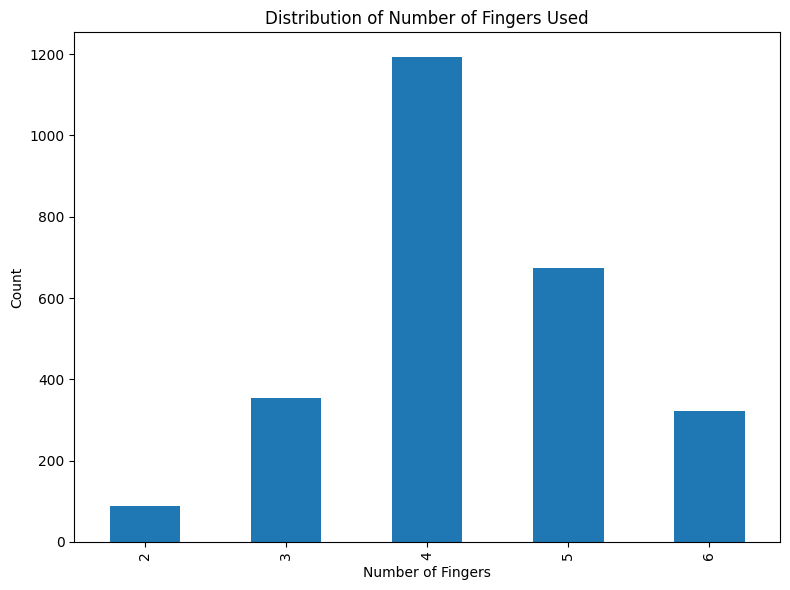

In [ ]:
# Analyze finger positions
df['non_muted_positions'] = df['FINGER_POSITIONS'].apply(lambda x: len([p for p in x.split(',') if p != 'x']))
plt.figure(figsize=(8, 6))
df['non_muted_positions'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Fingers Used')
plt.xlabel('Number of Fingers')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [ ]:
# Calculate some statistics about finger positions
print("\nStatistics about finger positions:")
finger_positions = df['FINGER_POSITIONS'].str.split(',', expand=True)
finger_positions = finger_positions.replace('x', None)
finger_positions = finger_positions.astype(float)
print(finger_positions.describe())


Statistics about finger positions:
                0            1            2            3            4  \
count  942.000000  1580.000000  2404.000000  2511.000000  2269.000000   
mean     1.414013     1.787975     1.996256     2.097172     2.256501   
std      0.972816     1.089408     1.148008     1.151526     1.289408   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      1.000000     1.000000     1.000000     1.000000     1.000000   
50%      1.000000     2.000000     2.000000     2.000000     2.000000   
75%      2.000000     3.000000     3.000000     3.000000     3.000000   
max      4.000000     4.000000     4.000000     4.000000     4.000000   

                 5  
count  1609.000000  
mean      1.970789  
std       1.443726  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       4.000000  
max       4.000000  


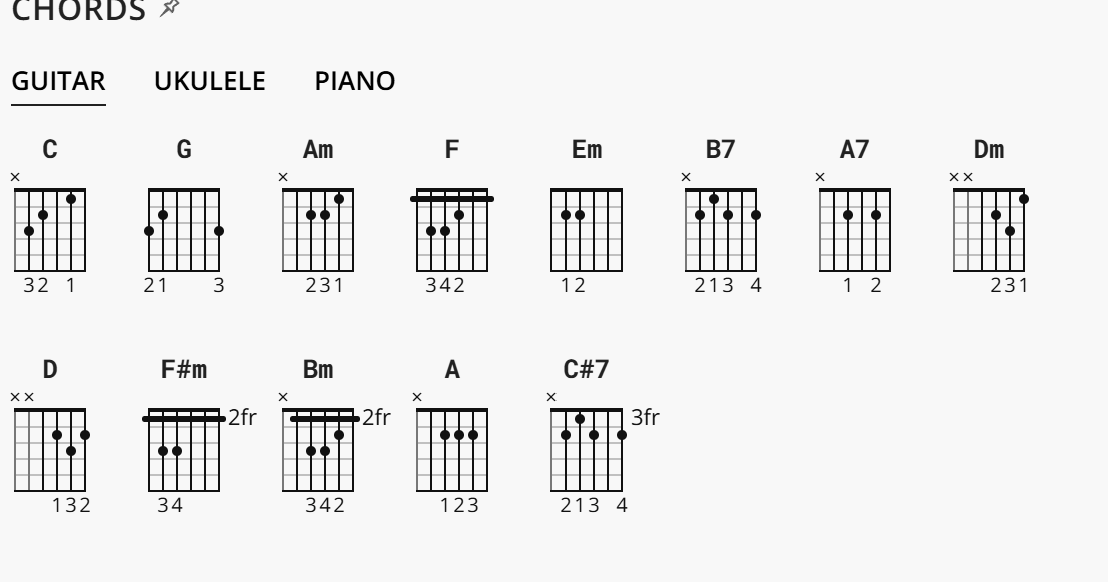



This is the cord progrssion of the can't help falling in love by elvis presley


**Finger placements of song (can't help falling in love by elvis presley) **

In [ ]:

from matplotlib.patches import Rectangle, Circle

In [ ]:
class GuitarChordVisualizer:
    def __init__(self, chord_data):
        self.df = pd.read_csv(chord_data, delimiter=';')
        self.string_names = ['E', 'A', 'D', 'G', 'B', 'e']

    def draw_fretboard(self, ax, num_frets=5):
        ax.add_patch(Rectangle((0, 0), num_frets, 5, fill=False, color='black'))
        for i in range(num_frets + 1):
            ax.plot([i, i], [0, 5], 'k-', linewidth=2)
        for i in range(6):
            ax.plot([0, num_frets], [i, i], 'k-', linewidth=1)
        for i, string in enumerate(self.string_names):
            ax.text(-0.5, i, string, ha='right', va='center')
        ax.set_xlim(-1, num_frets + 1)
        ax.set_ylim(-0.5, 5.5)
        ax.axis('off')

    def visualize_chord(self, root, chord_type, position=0):
        chord_data = self.df[(self.df['CHORD_ROOT'] == root) &
                            (self.df['CHORD_TYPE'] == chord_type)]

        if chord_data.empty:
            print(f"No data found for {root}{chord_type}")
            return

        fig, ax = plt.subplots(figsize=(10, 4))
        self.draw_fretboard(ax)

        positions = chord_data['FINGER_POSITIONS'].iloc[position].split(',')
        notes = chord_data['NOTE_NAMES'].iloc[position].split(',')

        for string, pos in enumerate(positions):
            if pos != 'x':
                fret = int(pos)
                ax.add_patch(Circle((fret + 0.5, 5-string), 0.3, color='blue', alpha=0.6))
                if string < len(notes):
                    ax.text(fret + 0.5, 5-string + 0.4, notes[string],
                           ha='center', va='bottom')

        plt.title(f'{root}{chord_type}')
        plt.tight_layout()
        return fig


In [ ]:
visualizer = GuitarChordVisualizer('chord-fingers.csv')


In [ ]:
progression = [
    ('C', 'maj'),  # I
    ('G', 'maj'),  # V
    ('A', 'm'),    # vi
    ('F', 'maj'),  # IV
]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Basic chord progression analysis:

Chord: Cmaj
Finger positions: 0,3,2,0,1,0
Notes: E,C,E,G,C,E

Chord: Gmaj
Finger positions: 2,1,0,0,0,3
Notes: G,B,D,G,B,G

Chord: Am
Finger positions: x,0,2,3,1,0
Notes: A,E,A,C,E

Chord: Fmaj
Finger positions: 1,3,4,2,1,1
Notes: F,C,F,A,C,F


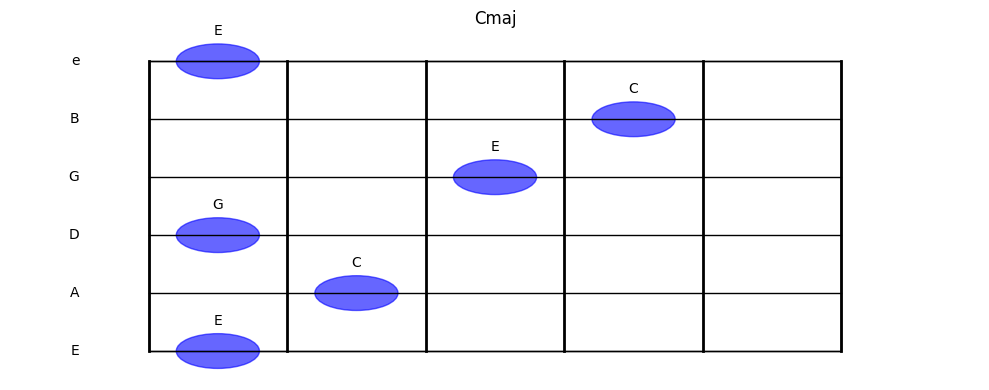

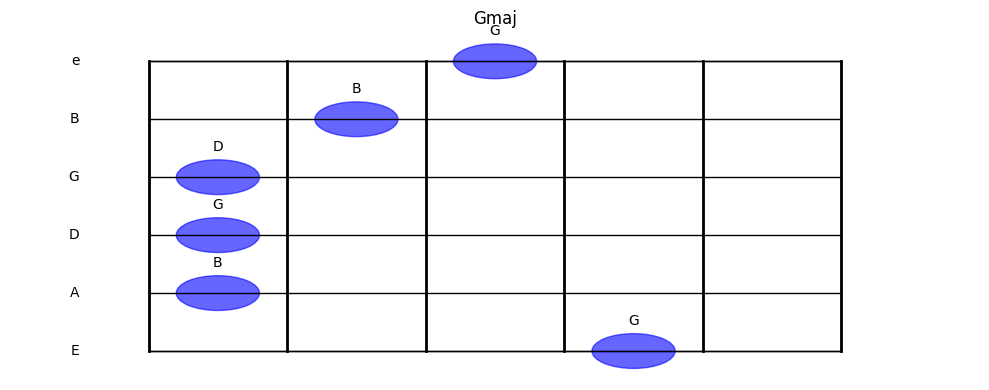

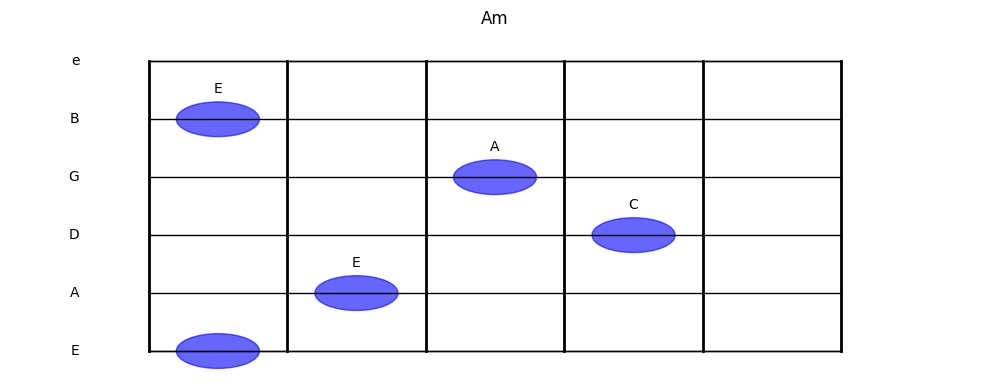

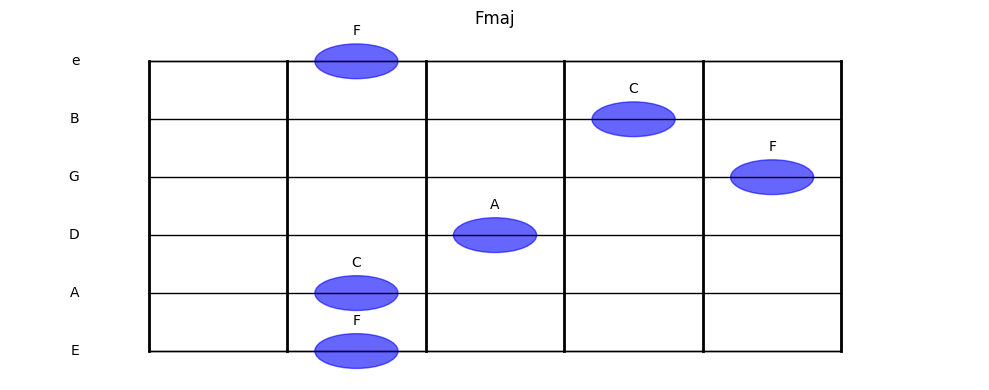

In [ ]:
print("Basic chord progression analysis:")
for root, chord_type in progression:
    print(f"\nChord: {root}{chord_type}")
    chord_data = visualizer.df[(visualizer.df['CHORD_ROOT'] == root) &
                              (visualizer.df['CHORD_TYPE'] == chord_type)]
    if not chord_data.empty:
        print("Finger positions:", chord_data['FINGER_POSITIONS'].iloc[0])
        print("Notes:", chord_data['NOTE_NAMES'].iloc[0])
        visualizer.visualize_chord(root, chord_type)

plt.show()